In [1]:
import MDAnalysis as mda
import prolif as plf


In [2]:
u = mda.Universe('lysosyme/hewl.prmtop','lysosyme/hewl_ph4.5_5repl_1000ns.pdb')

In [102]:
#lig = u.atoms.select_atoms("resnum  132 134 136 138 140 142 144 146 148")
lig = u.atoms.select_atoms("resnum  132")
prot = u.atoms.select_atoms("protein")
lig, prot

(<AtomGroup with 52 atoms>, <AtomGroup with 1961 atoms>)

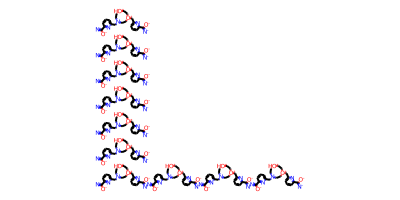

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
# create a molecule from the MDAnalysis selection
lmol = plf.Molecule.from_mda(lig)
# cleanup before drawing
mol = Chem.RemoveHs(lmol)
mol.RemoveAllConformers()
Draw.MolToImage(mol, size=(400,200))

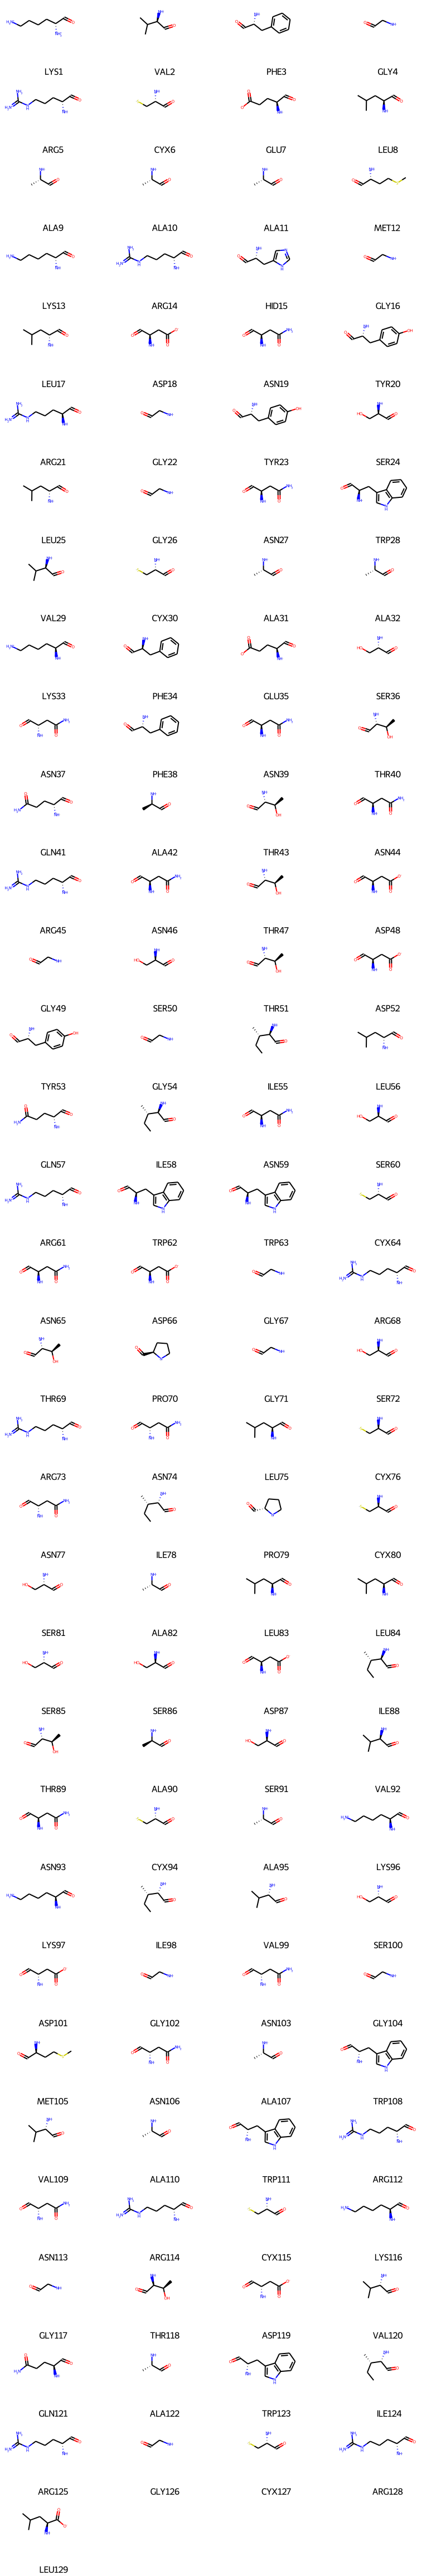

In [5]:
pmol = plf.Molecule.from_mda(prot)
frags = []
# to show all residues, simply use `for res in pmol:`
for i in range(129):
    res = pmol[i]
    mol = Chem.RemoveHs(res)
    mol.RemoveAllConformers()
    frags.append(mol)
Draw.MolsToGridImage(frags,
                     legends=[str(res.resid) for res in pmol],
                     subImgSize=(200, 140),
                     molsPerRow=4,
                     maxMols=prot.n_residues)



In [103]:
# use default interactions
fp = plf.Fingerprint()
# run on a slice of frames from begining to end with a step of 10
fp.run(u.trajectory[::10], lig, prot,residues="all")

  0%|          | 0/1000 [00:00<?, ?it/s]

<prolif.fingerprint.Fingerprint: 8 interactions: ['Hydrophobic', 'HBDonor', 'HBAcceptor', 'Cationic', 'Anionic', 'PiCation', 'CationPi', 'PiStacking'] at 0x7f1e0ed78a90>

In [105]:
df = fp.to_dataframe()

In [106]:
df.head()

ligand           XOD132                                                  \
protein            VAL2        PHE3        GLU7        ALA9       ALA10   
interaction Hydrophobic Hydrophobic Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                     
0                 False       False       False       False       False   
10                False       False       False       False       False   
20                False       False       False       False       False   
30                False       False       False       False       False   
40                False       False       False       False       False   

ligand                                                           ...  \
protein           LYS13                                   ARG14  ...   
interaction Hydrophobic HBAcceptor Anionic PiCation Hydrophobic  ...   
Frame                                                            ...   
0                 False      False   False    False       False  ...   
10                False      False   False    False       False  ...   
20                False      False   False    False       False  ...   
30                False      False   False    False       False  ...   
40                False      False   False    False       False  ...   

ligand                                                                       \
protein          GLY126      CYX127      ARG128                               
interaction Hydrophobic Hydrophobic Hydrophobic HBAcceptor Anionic PiCation   
Frame                                                                         
0                 False       False       False      False   False    False   
10                False       False       False      False   False    False   
20                False       False       False      False   False    False   
30                False       False       False      False   False    False   
40                False       False       False      False   False    False   

ligand                                               
protein          LEU129                              
interaction Hydrophobic HBDonor HBAcceptor Cationic  
Frame                                                
0                 False   False      False    False  
10                False   False      False    False  
20                False   False      False    False  
30                False   False      False    False  
40                False   False      False    False  

[5 rows x 76 columns]

In [115]:
dft = fp.to_dataframe(return_atoms=True)
#df1 = df.xs("XOD132",axis=1)

/home/ngillet/miniconda3/envs/prolif/lib/python3.9/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#494949') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/home/ngillet/miniconda3/envs/prolif/lib/python3.9/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#494949') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/home/ngillet/miniconda3/envs/prolif/lib/python3.9/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#494949') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/home/ngil

/home/ngillet/miniconda3/envs/prolif/lib/python3.9/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#494949') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/home/ngillet/miniconda3/envs/prolif/lib/python3.9/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#494949') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/home/ngillet/miniconda3/envs/prolif/lib/python3.9/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#494949') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/home/ngil

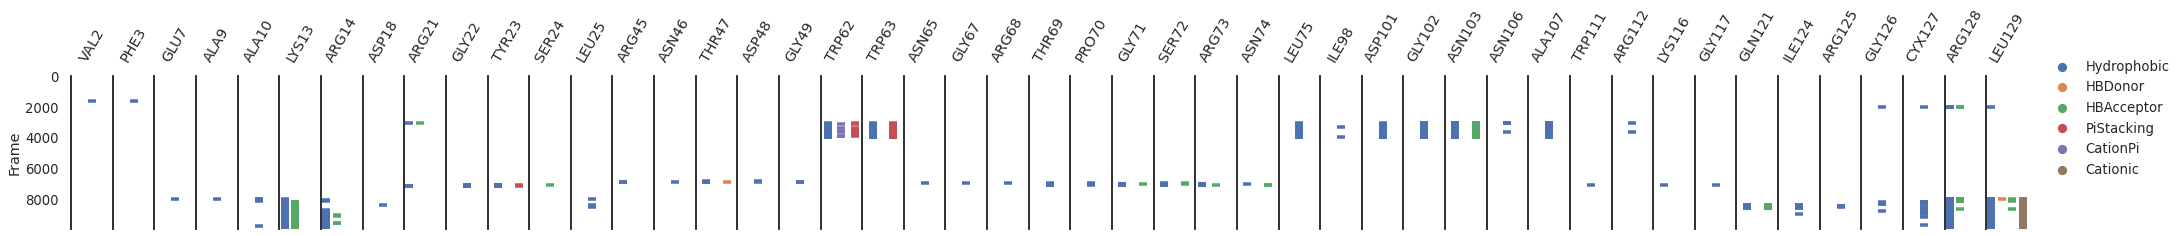

In [113]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# reorganize data
data = df1.reset_index()
data = pd.melt(data, id_vars=["Frame"], var_name=["residue","interaction"])
data = data[data["value"] != False]
data.reset_index(inplace=True, drop=True)

# plot
sns.set_theme(font_scale=.8, style="white", context="talk")
g = sns.catplot(
    data=data, x="interaction", y="Frame", hue="interaction", col="residue",
    hue_order=["Hydrophobic", "HBDonor", "HBAcceptor", "PiStacking", "CationPi", "Cationic"],
    height=3, aspect=0.2, jitter=0, sharex=False, marker="_", s=8, linewidth=3.5,
)
g.set_titles("{col_name}")
g.set(xticks=[], ylim=(-.5, data.Frame.max()+1))
g.set_xticklabels([])
g.set_xlabels("")
g.fig.subplots_adjust(wspace=0)
g.add_legend()
g.despine(bottom=True)
for ax in g.axes.flat:
    ax.invert_yaxis()
    ax.set_title(ax.get_title(), pad=15, rotation=60, ha="center", va="baseline")

In [19]:

conda install seaborn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [100]:
# calculate the occurence of each interaction on the trajectory
occ = df.mean()
# restrict to the frequent ones
occ.loc[occ > 0.09]

ligand  protein  interaction
XOD136  ASN46    Hydrophobic    0.191
        ASP48    Hydrophobic    0.201
                 Cationic       0.187
        SER50    Hydrophobic    0.091
        ASN59    Hydrophobic    0.167
        ARG61    Hydrophobic    0.187
                 Anionic        0.132
        TRP62    Hydrophobic    0.165
dtype: float64

In [53]:
# regroup all interactions together and do the same
g = (df.groupby(level=["protein"], axis=1)
       .sum()
       .astype(bool)
       .mean())
g.loc[g > 0.1]

protein
ARG128    0.145
LEU129    0.198
LYS13     0.138
dtype: float64

In [26]:
conda install -c conda-forge networkx=2.5

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [118]:

from prolif.plotting.network import LigNetwork
# create RDKit-like molecules for visualisation
lmol = plf.Molecule.from_mda(lig)
pmol = plf.Molecule.from_mda(prot)

                                   

net = LigNetwork.from_ifp(dft, lmol,
                          # replace with `kind="frame", frame=0` for the other depiction
                          kind="frame",frame=9160,threshold=.1,
                          rotation=270)
net.display()



In [30]:
import networkx as nx
from pyvis.network import Network
from tqdm.auto import tqdm
from matplotlib import cm, colors
from IPython.display import IFrame
import numpy as np
def make_graph(values, df=None,
               node_color=["#FFB2AC", "#ACD0FF"], node_shape="dot",
               edge_color="#a9a9a9", width_multiplier=1):
    """Convert a pandas DataFrame to a NetworkX object

    Parameters
    ----------
    values : pandas.Series
        Series with 'ligand' and 'protein' levels, and a unique value for
        each lig-prot residue pair that will be used to set the width and weigth
        of each edge. For example:

            ligand  protein
            LIG1.G  ALA216.A    0.66
                    ALA343.B    0.10

    df : pandas.DataFrame
        DataFrame obtained from the fp.to_dataframe() method
        Used to label each edge with the type of interaction

    node_color : list
        Colors for the ligand and protein residues, respectively

    node_shape : str
        One of ellipse, circle, database, box, text or image, circularImage,
        diamond, dot, star, triangle, triangleDown, square, icon.

    edge_color : str
        Color of the edge between nodes

    width_multiplier : int or float
        Each edge's width is defined as `width_multiplier * value`
    """
    lig_res = values.index.get_level_values("ligand").unique().tolist()
    prot_res = values.index.get_level_values("protein").unique().tolist()

    G = nx.Graph()
    # add nodes
    # https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_node
    for res in lig_res:
        G.add_node(res, title=res, shape=node_shape,
                   color=node_color[0], dtype="ligand")
    for res in prot_res:
        G.add_node(res, title=res, shape=node_shape,
                   color=node_color[1], dtype="protein")

    for resids, value in values.items():
        label = "{} - {}<br>{}".format(*resids, "<br>".join([f"{k}: {v}"
                                       for k, v in (df.xs(resids,
                                                          level=["ligand", "protein"],
                                                          axis=1)
                                                      .sum()
                                                      .to_dict()
                                                      .items())]))
        # https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_edge
        G.add_edge(*resids, title=label, color=edge_color,
                   weight=value, width=value*width_multiplier)

    return G



In [31]:
data = (df.groupby(level=["ligand", "protein"], axis=1)
          .sum()
          .astype(bool)
          .mean())

G = make_graph(data, df, width_multiplier=3)

# display graph
net = Network(width=600, height=500, notebook=True, heading="")
net.from_nx(G)
net.write_html("lig-prot_graph.html")
IFrame("lig-prot_graph.html", width=610, height=510)

In [32]:


data = (df.xs("Cationic", level="interaction", axis=1)
          .mean())

G = make_graph(data, df, width_multiplier=3)

# display graph
net = Network(width=600, height=500, notebook=True, heading="")
net.from_nx(G)
net.write_html("lig-prot_cationic_graph.html")
IFrame("lig-prot_cationic_graph.html", width=610, height=510)



In [33]:

data = (df.xs("Hydrophobic", level="interaction", axis=1)
          .mean())

G = make_graph(data, df, width_multiplier=3)

# display graph
net = Network(width=600, height=500, notebook=True, heading="")
net.from_nx(G)
net.write_html("lig-prot_Hydrophobic_graph.html")
IFrame("lig-prot_Hydrophobic_graph.html", width=610, height=510)